In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')
df = data.copy() # To keep the data as backup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

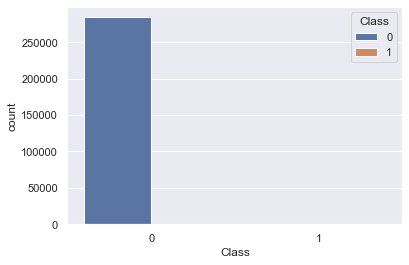

In [8]:
sns.countplot(x=df.Class, hue=df.Class)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

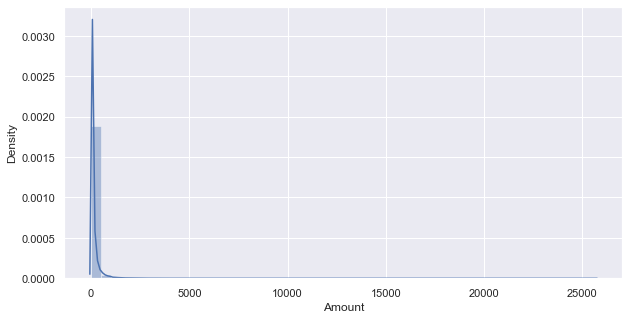

In [9]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [10]:
df['Amount-Bins'] = ''

In [11]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [12]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [ ]:
Now, adding bins in the column Amount-Bins.

In [13]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [14]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

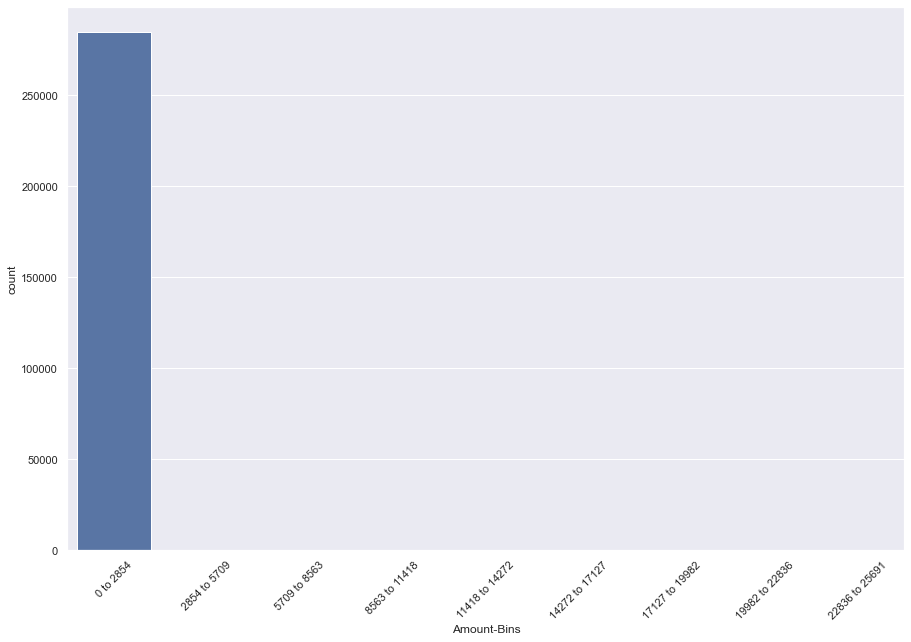

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

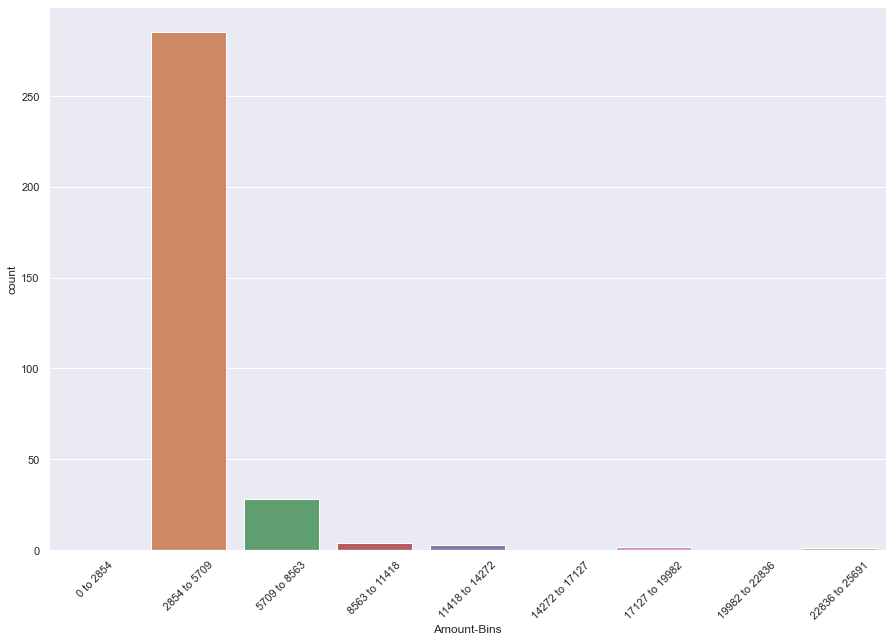

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

Predictive Modelling
Let's predict whether a credit card is fraud or not using machine learning.

One-hot encoding the Amount-Bins
Since, for classification, we need to pass the data in numerical form. That's why we need to One-Hot encode the Amount-Bins column.
Note: We can also label encode values.

In [17]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


Breaking the dataset into training and testing
First, separating the response variable from the explanatory variables.

In [19]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 39), (284807,))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


Applying Machine Learning Algorithms
Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm. Algorithms to be used are:

Logistic Regression
Support Vector Machine
Naive Bayes
K-Nearest Neighbors
Random Forest
Ada Boost
XGBoost
The metrics we'll use initially are:

Accuracy
Precision
F1-Score
The main metrics we'll look at are (Reason is mentioned later):

Recall
AUC/RUC Curve

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [23]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [24]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

Before going further into metrics, let's first decide either Type-I or Type-II error is more important to consider.

Type-I  Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

So, for Type-II Error, We can say that recall is the important metric.

In [25]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [26]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,86,50
Not Fraud,35,85272


<AxesSubplot:>

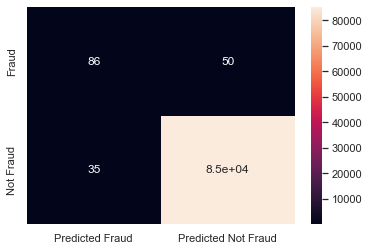

In [27]:
sns.heatmap(conf_matrix, annot=True)

Heatmap also suggests that the data is highly imbalanced.

Let's look at the accuracy score.

In [28]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9990051847430451

We can see here that accuracy is great. Around 99%.
BUT WAIT
We know that the dataset is highly unbalanced and accuracy takes into account the whole confusion matrix. So we can say that this measure is not suitable.

Let's look at precision and recall.

In [29]:
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision

0.7107438016528925

In [30]:
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall

0.6323529411764706

In [31]:
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train

0.6769662921348315

In [32]:
from sklearn.metrics import f1_score

In [33]:
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.6692607003891051

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.63      0.67       136

    accuracy                           1.00     85443
   macro avg       0.86      0.82      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [36]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9340885755875491

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

(0.9122904592735022, 0.9238500788501599)

In [45]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

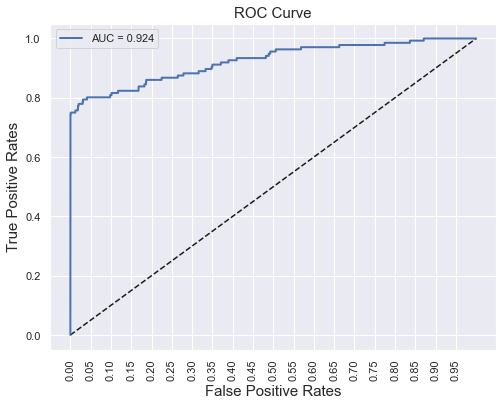

In [46]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))


In [47]:
recall_score(ytest, model.predict(xtest_poly))

0.75

Support Vector Machine
Let's try the Support Vector Machine algorithm.

Now, for support vector machines, we need to train the model after scaling the features. Let's first do that.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms = MinMaxScaler()

In [50]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,1,0,0,0,0,0,0,0,0


In [51]:
X_scaled = mms.fit_transform(X)

In [52]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)

In [53]:
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [54]:
from sklearn.svm import SVC

In [55]:
svc_model = SVC(kernel='linear', probability=True)

In [56]:
svc_model.fit(xtrainS, ytrainS)

SVC(kernel='linear', probability=True)

In [57]:
svc_pred = svc_model.predict(xtestS)

In [58]:
svc_recall = recall_score(ytestS, svc_pred)

In [59]:
svc_recall

0.8014705882352942

In [60]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]

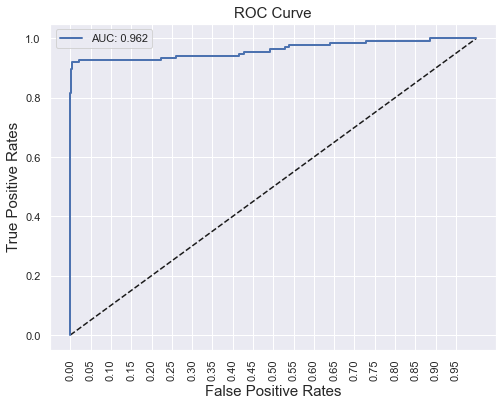

In [61]:
# First, getting the auc score
svc_auc = roc_auc_score(ytestS, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

Tuning the Hyper-parameters
Now, let's tune some of the hyper-parameters of SVM and then compare the scores.

In [62]:
# For Kernel = rbf
tuned_rbf = {'kernel': ['rbf'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

For kernel rbf:

In [ ]:
rs_rbf.best_estimator_